## Recurrent Neural Network

A recurrent neural network, LSTM,to predict the price of Shib using historical data or context(30 days of the past).

#### Scrape data from yfinance API

In [4]:
import yfinance
import numpy as np
import pandas as pd
start = "2020-08-01"
end = "2022-08-01"
symbol = "SHIB-USD"
df = yfinance.download(symbol)
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,1604789
2020-08-02,0.000000,0.000000,0.000000,0.000000,0.000000,193098
2020-08-03,0.000000,0.000000,0.000000,0.000000,0.000000,129225
2020-08-04,0.000000,0.000000,0.000000,0.000000,0.000000,19717
2020-08-05,0.000000,0.000000,0.000000,0.000000,0.000000,26869
...,...,...,...,...,...,...
2023-09-30,0.000007,0.000007,0.000007,0.000007,0.000007,65748769
2023-10-01,0.000007,0.000008,0.000007,0.000008,0.000008,88431124
2023-10-02,0.000008,0.000008,0.000007,0.000007,0.000007,123294741


### Check for Null values

In [5]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

#### Save Training data to CSV

In [6]:
df.to_csv("train.csv")

### Data Visualization

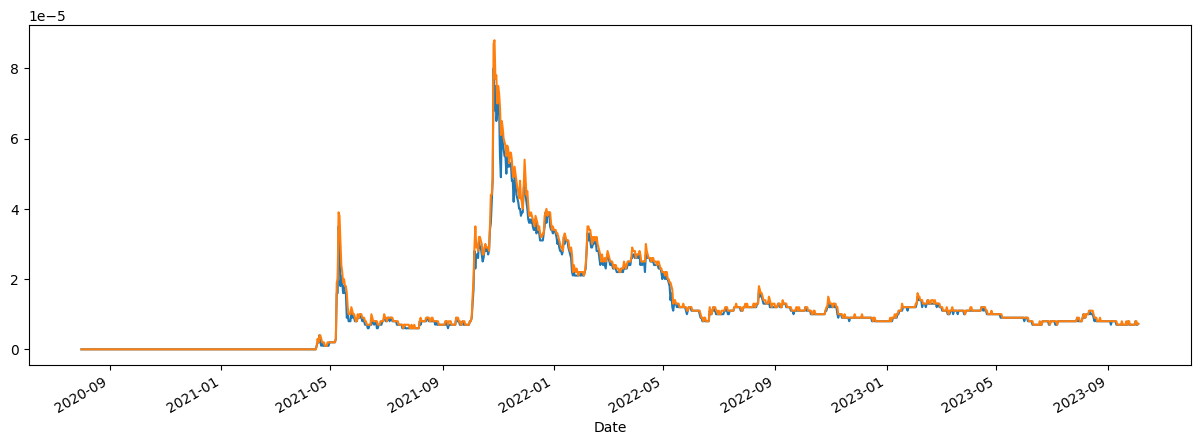

In [9]:
import matplotlib.pyplot as plt

df["Adj Close"].plot(figsize=(15,5))

df["High"].plot(figsize=(15,5))
plt.show()

Create a Rolling Window to show the rolling average on a certain window

In [10]:
NUMBER_OF_DAYS = 5

df["5-Day Rolling Window(Adj Close)"] = df["Adj Close"].rolling(window= NUMBER_OF_DAYS).mean()
df

,Open,High,Low,Close,Adj Close,Volume,5-Day Rolling Window(Adj Close)
Date,,,,,,,
2020-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,1604789,NaN
2020-08-02,0.000000,0.000000,0.000000,0.000000,0.000000,193098,NaN
2020-08-03,0.000000,0.000000,0.000000,0.000000,0.000000,129225,NaN
2020-08-04,0.000000,0.000000,0.000000,0.000000,0.000000,19717,NaN
2020-08-05,0.000000,0.000000,0.000000,0.000000,0.000000,26869,0.000000
...,...,...,...,...,...,...,...
2023-09-30,0.000007,0.000007,0.000007,0.000007,0.000007,65748769,0.000007
2023-10-01,0.000007,0.000008,0.000007,0.000008,0.000008,88431124,0.000007
2023-10-02,0.000008,0.000008,0.000007,0.000007,0.000007,123294741,0.000007


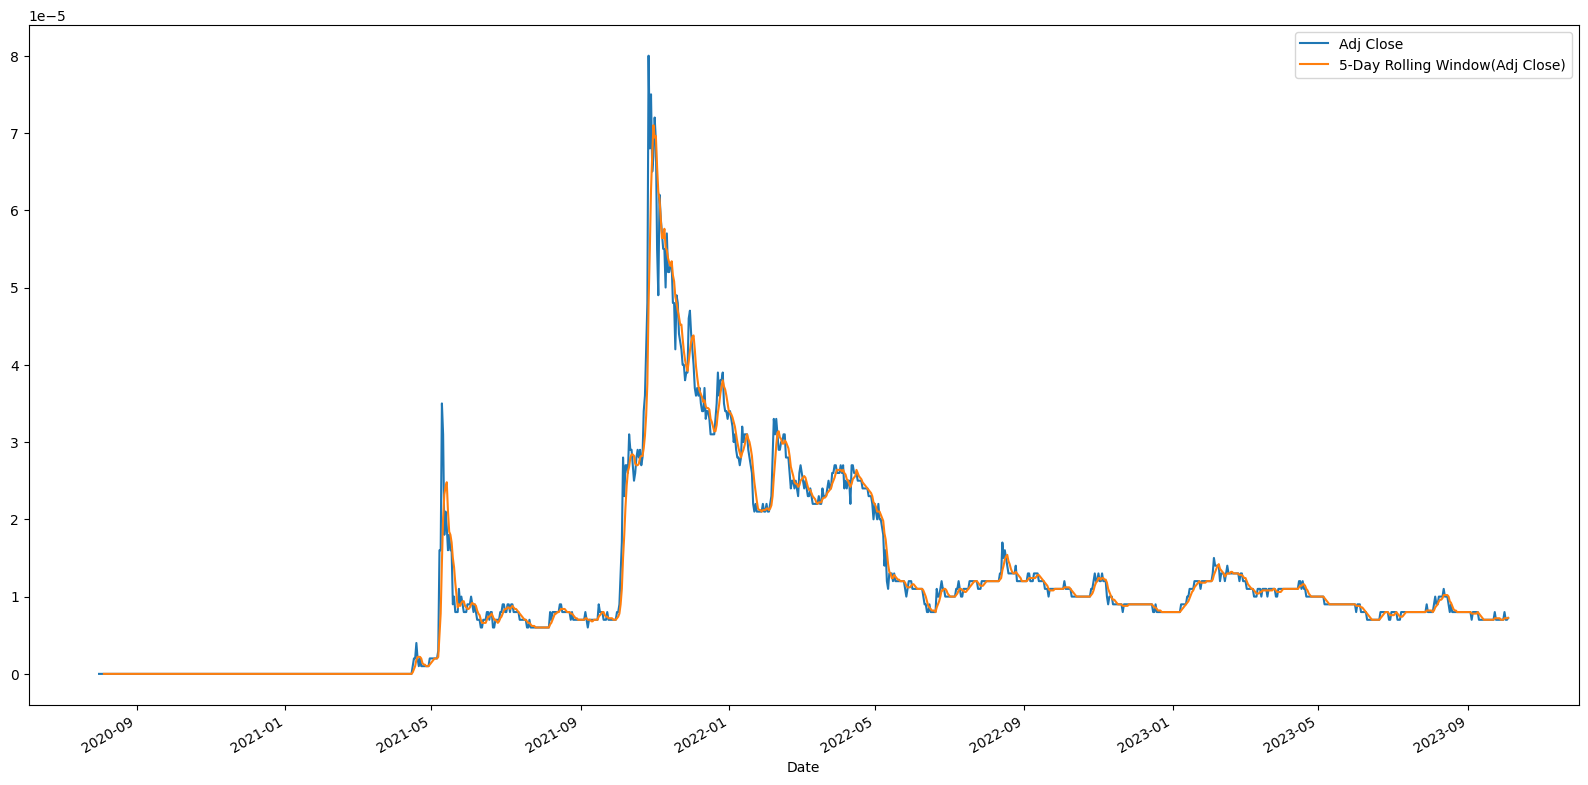

In [12]:
df[["Adj Close", "5-Day Rolling Window(Adj Close)"]].plot(figsize=(20,10))
plt.show()

### Build a Training Dataset

In [13]:
training_dataset = df["Adj Close"]
training_dataset

Date
2020-08-01    0.000000
2020-08-02    0.000000
2020-08-03    0.000000
2020-08-04    0.000000
2020-08-05    0.000000
                ...   
2023-09-30    0.000007
2023-10-01    0.000008
2023-10-02    0.000007
2023-10-03    0.000007
2023-10-04    0.000007
Name: Adj Close, Length: 1119, dtype: float64

In [14]:
# convert to DataFrame
training_df = pd.DataFrame(training_dataset)
training_df

,Adj Close
Date,
2020-08-01,0.000000
2020-08-02,0.000000
2020-08-03,0.000000
2020-08-04,0.000000
2020-08-05,0.000000
...,...
2023-09-30,0.000007
2023-10-01,0.000008
2023-10-02,0.000007


In [15]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1119 entries, 2020-08-01 to 2023-10-04
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1119 non-null   float64
dtypes: float64(1)
memory usage: 17.5 KB


#### Scaling the features

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaling_object = MinMaxScaler(feature_range=(0, 1))  # Normalization

scaled_train_df = scaling_object.fit_transform(training_df)
scaled_train_df


array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.0875    ],
       [0.0875    ],
       [0.09033111]])

In [21]:
len(scaled_train_df)

1119

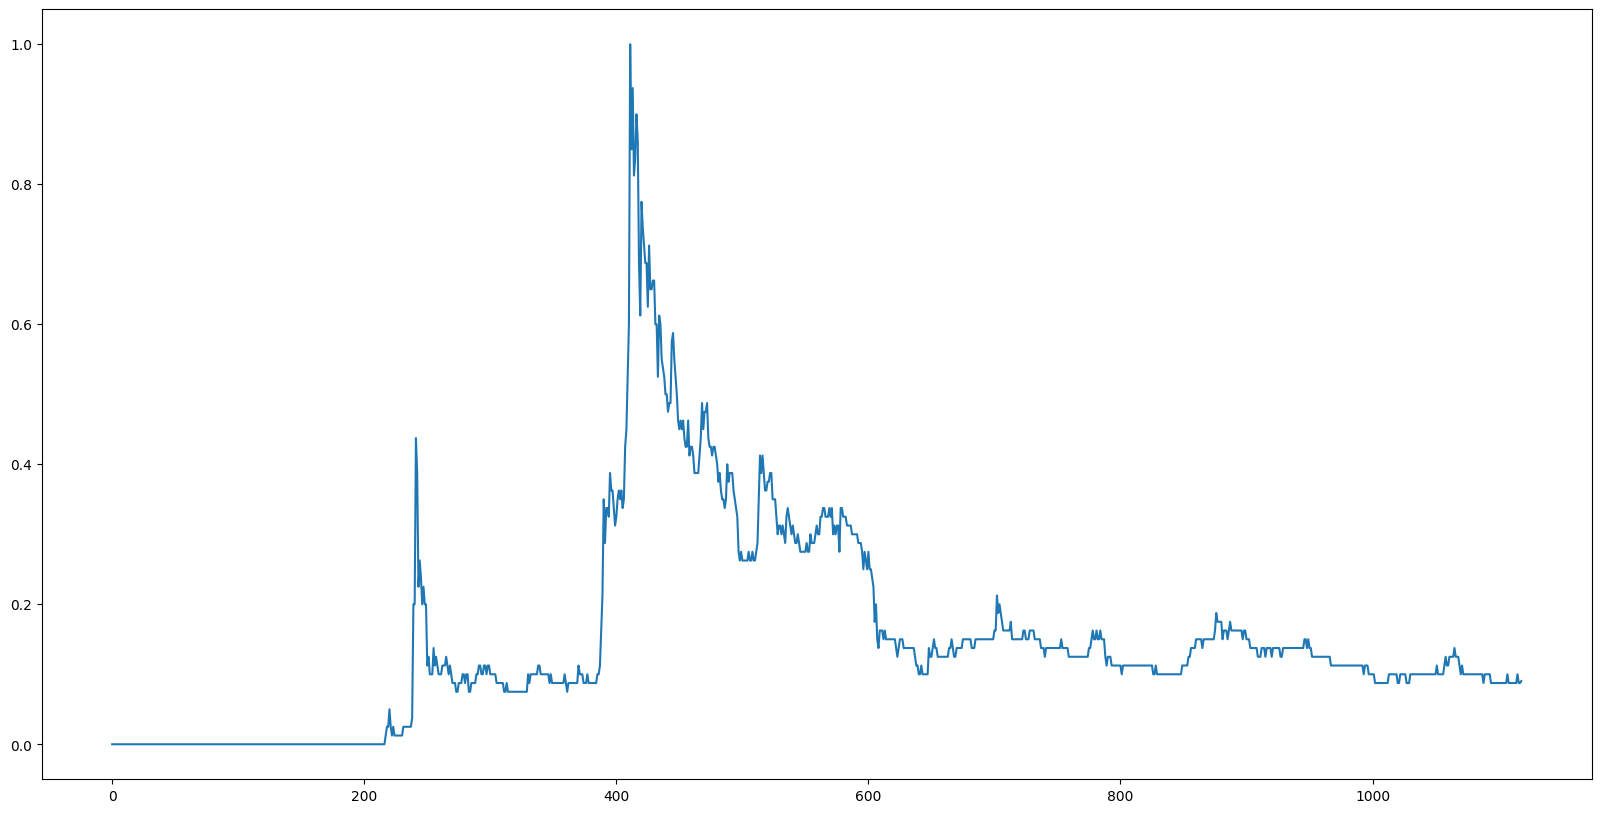

In [20]:
plt.figure(figsize=(20,10))
plt.plot(scaled_train_df)
plt.show()

In [22]:
DAYS_FOR_DATASET = 30

X_train = []

y_train = []

for i in range(DAYS_FOR_DATASET, len(scaled_train_df)):
    X_train.append(scaled_train_df[i-DAYS_FOR_DATASET: i, 0])
    
    y_train.append(scaled_train_df[i, 0])   # current day

X_train

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0.

In [23]:
y_train

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

### Convert to Numpy Array

In [24]:
X_train = np.array(X_train)
X_train

array([[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.1   , 0.1   , 0.0875, ..., 0.0875, 0.0875, 0.1   ],
       [0.1   , 0.0875, 0.1   , ..., 0.0875, 0.1   , 0.0875],
       [0.0875, 0.1   , 0.1   , ..., 0.1   , 0.0875, 0.0875]])

In [25]:
y_train = np.array(y_train)
y_train

array([0.        , 0.        , 0.        , ..., 0.0875    , 0.0875    ,
       0.09033111])

### Reshape X

In [26]:
# Reshape to a 1D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [0.    ]],

       ...,

       [[0.1   ],
        [0.1   ],
        [0.0875],
        ...,
        [0.0875],
        [0.0875],
        [0.1   ]],

       [[0.1   ],
        [0.0875],
        [0.1   ],
        ...,
        [0.0875],
        [0.1   ],
        [0.0875]],

       [[0.0875],
        [0.1   ],
        [0.1   ],
        ...,
        [0.1   ],
        [0.0875],
        [0.0875]]])

In [27]:
X_train.dtype

dtype('float64')

In [28]:
X_train.shape   #num of rows, rolling window, 1D

(1089, 30, 1)

In [29]:
y_train.shape

(1089,)

## Build a Tensorflow LSTM Neural Network

#### Predict the next day's price using the previous 30 days prices

In [30]:
import tensorflow as tf

neural_network = tf.keras.Sequential()
neural_network

In [31]:
from tensorflow.keras import layers

neural_network.add(layers.LSTM(units = 20,
                               input_shape = (DAYS_FOR_DATASET, 1)))
neural_network.add(layers.Dense(units = 1))
neural_network.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [33]:
LEARNING_RATE = 0.001

TRAINING_LOOPS = 20

BATCH_SIZE= 32

neural_network.compile(optimizer = tf.optimizers.Adam(LEARNING_RATE),
                       loss="mean_squared_error")

neural_network.fit(X_train, y_train, epochs = TRAINING_LOOPS, batch_size=BATCH_SIZE)

Epoch 1/20
35/35 [==============================] - 5s 14ms/step - loss: 0.0152
Epoch 2/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0034
Epoch 3/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0029
Epoch 4/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0026
Epoch 5/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0024
Epoch 6/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 7/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0020
Epoch 8/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 9/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 10/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 11/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 12/20
35/35 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 13/20
35/35 [==================

## Load Test Data

In [34]:
tesing_start_date = "2022-08-02"
testing_end_date = "2023-10-02"
symbol = "SHIB-USD"
testing_df = yfinance.download(symbol, tesing_start_date,testing_end_date)
testing_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-02,0.000012,0.000012,0.000012,0.000012,0.000012,395081060
2022-08-03,0.000012,0.000012,0.000012,0.000012,0.000012,317439052
2022-08-04,0.000012,0.000012,0.000012,0.000012,0.000012,301914202
2022-08-05,0.000012,0.000012,0.000012,0.000012,0.000012,337423841
2022-08-06,0.000012,0.000012,0.000012,0.000012,0.000012,278723005
...,...,...,...,...,...,...
2023-09-27,0.000007,0.000007,0.000007,0.000007,0.000007,79818891
2023-09-28,0.000007,0.000007,0.000007,0.000007,0.000007,70874096
2023-09-29,0.000007,0.000007,0.000007,0.000007,0.000007,85364141


In [35]:
testing_df.to_csv("test.csv")

In [36]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2022-08-02 to 2023-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       426 non-null    float64
 1   High       426 non-null    float64
 2   Low        426 non-null    float64
 3   Close      426 non-null    float64
 4   Adj Close  426 non-null    float64
 5   Volume     426 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.3 KB


In [37]:
test_dataset = testing_df["Adj Close"]
test_dataset

Date
2022-08-02    0.000012
2022-08-03    0.000012
2022-08-04    0.000012
2022-08-05    0.000012
2022-08-06    0.000012
                ...   
2023-09-27    0.000007
2023-09-28    0.000007
2023-09-29    0.000007
2023-09-30    0.000007
2023-10-01    0.000008
Name: Adj Close, Length: 426, dtype: float64

In [39]:
# Convert to Pandas DataFrame
test_df = pd.DataFrame(test_dataset)
test_df

,Adj Close
Date,
2022-08-02,0.000012
2022-08-03,0.000012
2022-08-04,0.000012
2022-08-05,0.000012
2022-08-06,0.000012
...,...
2023-09-27,0.000007
2023-09-28,0.000007
2023-09-29,0.000007


### Scale the Dataset

In [40]:
scaled_test_data = scaling_object.fit_transform(test_df)
scaled_test_data


array([[0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.59999996],
       [0.59999996],
       [1.        ],
       [0.79999994],
       [0.89999997],
       [0.79999994],
       [0.7       ],
       [0.59999996],
       [0.59999996],
       [0.59999996],
       [0.59999996],
       [0.59999996],
       [0.59999996],
       [0.7       ],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.59999996],
       [0.59999996],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.59999996],
       [0.59999996],
       [0.59999996],
       [0.59999996],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.399

In [41]:
scaled_test_data = pd.DataFrame(scaled_test_data)
scaled_test_data

,0
0,0.5
1,0.5
2,0.5
3,0.5
4,0.5
...,...
421,0.0
422,0.0
423,0.0
424,0.0


## Build Features And Labels for Testing the Neural Network

Combine Train and Test Data

In [42]:
train_and_test_data = pd.concat((df["Adj Close"],
                                 test_df["Adj Close"]),
                                 axis=0)


inputs = train_and_test_data[len(train_and_test_data) - len(test_df)- DAYS_FOR_DATASET: ].values

inputs

array([7.99999998e-06, 7.99999998e-06, 7.99999998e-06, 7.99999998e-06,
       7.99999998e-06, 7.00000010e-06, 7.00000010e-06, 7.00000010e-06,
       7.00000010e-06, 7.00000010e-06, 7.00000010e-06, 7.00000010e-06,
       7.00000010e-06, 7.00000010e-06, 7.00000010e-06, 7.00000010e-06,
       7.00000010e-06, 7.00000010e-06, 7.99999998e-06, 7.00000010e-06,
       7.00000010e-06, 7.00000010e-06, 7.00000010e-06, 7.00000010e-06,
       7.00000010e-06, 7.00000010e-06, 7.99999998e-06, 7.00000010e-06,
       7.00000010e-06, 7.22648883e-06, 1.20000004e-05, 1.20000004e-05,
       1.20000004e-05, 1.20000004e-05, 1.20000004e-05, 1.20000004e-05,
       1.20000004e-05, 1.20000004e-05, 1.20000004e-05, 1.20000004e-05,
       1.29999999e-05, 1.29999999e-05, 1.70000003e-05, 1.49999996e-05,
       1.60000000e-05, 1.49999996e-05, 1.40000002e-05, 1.29999999e-05,
       1.29999999e-05, 1.29999999e-05, 1.29999999e-05, 1.29999999e-05,
       1.29999999e-05, 1.40000002e-05, 1.20000004e-05, 1.20000004e-05,
      

In [43]:
inputs = inputs.reshape(-1, 1)
inputs

array([[7.99999998e-06],
       [7.99999998e-06],
       [7.99999998e-06],
       [7.99999998e-06],
       [7.99999998e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.99999998e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.99999998e-06],
       [7.00000010e-06],
       [7.00000010e-06],
       [7.22648883e-06],
       [1.20000004e-05],
       [1.20000004e-05],
       [1.20000004e-05],
       [1.20000004e-05],
       [1.20000004e-05],
       [1.20000004e-05],
       [1.20000004e-05],
       [1.20000004e-05],
       [1.20000004e-05],
       [1.20000004e-05],


In [44]:
inputs = scaling_object.transform(inputs)
inputs

c:\Users\user\miniconda3\envs\tf-gpu-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.09999999],
       [0.09999999],
       [0.09999999],
       [0.09999999],
       [0.09999999],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.09999999],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.09999999],
       [0.        ],
       [0.        ],
       [0.02264887],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.50000002],
       [0.59999996],
       [0.59999996],
       [1.        ],
       [0.79999994],
       [0.89999997],
       [0.79999994],
       [0.7       ],
       [0.599

### Create Features and Labels

In [46]:
X_test =[]
y_test = []

NUMBER_OF_PREDICTION_DAYS = test_df.shape[0]

for i in range(DAYS_FOR_DATASET, DAYS_FOR_DATASET + NUMBER_OF_PREDICTION_DAYS):
    X_test.append(inputs[i-DAYS_FOR_DATASET:i, 0])   # the previous 30 days up to the current day
    y_test.append(inputs[i, 0])   # the current date

In [47]:
X_test

[array([0.09999999, 0.09999999, 0.09999999, 0.09999999, 0.09999999,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.09999999, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.09999999, 0.        , 0.        , 0.02264887]),
 array([0.09999999, 0.09999999, 0.09999999, 0.09999999, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.09999999, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09999999, 0.        , 0.        , 0.02264887, 0.50000002]),
 array([0.09999999, 0.09999999, 0.09999999, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [48]:
y_test

[0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5999999636202128,
 0.5999999636202128,
 1.0,
 0.7999999363353721,
 0.8999999681676861,
 0.7999999363353721,
 0.6999999954525266,
 0.5999999636202128,
 0.5999999636202128,
 0.5999999636202128,
 0.5999999636202128,
 0.5999999636202128,
 0.5999999636202128,
 0.6999999954525266,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5999999636202128,
 0.5999999636202128,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5999999636202128,
 0.5999999636202128,
 0.5999999636202128,
 0.5999999636202128,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.5000000227373672,
 0.3999999909050532,
 0.3999

In [52]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test

array([[0.09999999, 0.09999999, 0.09999999, ..., 0.        , 0.        ,
        0.02264887],
       [0.09999999, 0.09999999, 0.09999999, ..., 0.        , 0.02264887,
        0.50000002],
       [0.09999999, 0.09999999, 0.09999999, ..., 0.02264887, 0.50000002,
        0.50000002],
       ...,
       [0.09999999, 0.09999999, 0.09999999, ..., 0.        , 0.        ,
        0.        ],
       [0.09999999, 0.09999999, 0.09999999, ..., 0.        , 0.        ,
        0.        ],
       [0.09999999, 0.09999999, 0.09999999, ..., 0.        , 0.        ,
        0.        ]])

In [53]:
y_test

array([0.50000002, 0.50000002, 0.50000002, 0.50000002, 0.50000002,
       0.50000002, 0.50000002, 0.50000002, 0.50000002, 0.50000002,
       0.59999996, 0.59999996, 1.        , 0.79999994, 0.89999997,
       0.79999994, 0.7       , 0.59999996, 0.59999996, 0.59999996,
       0.59999996, 0.59999996, 0.59999996, 0.7       , 0.50000002,
       0.50000002, 0.50000002, 0.50000002, 0.50000002, 0.50000002,
       0.50000002, 0.50000002, 0.50000002, 0.59999996, 0.59999996,
       0.50000002, 0.50000002, 0.50000002, 0.59999996, 0.59999996,
       0.59999996, 0.59999996, 0.50000002, 0.50000002, 0.50000002,
       0.50000002, 0.50000002, 0.39999999, 0.39999999, 0.39999999,
       0.29999996, 0.39999999, 0.39999999, 0.39999999, 0.39999999,
       0.39999999, 0.39999999, 0.39999999, 0.39999999, 0.39999999,
       0.39999999, 0.39999999, 0.39999999, 0.50000002, 0.39999999,
       0.39999999, 0.39999999, 0.39999999, 0.39999999, 0.29999996,
       0.29999996, 0.29999996, 0.29999996, 0.29999996, 0.29999

In [ ]:
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test

### Visualize Model Predictions

In [54]:
predicted_prices = neural_network.predict(X_test)

14/14 [==============================] - 1s 6ms/step


In [55]:
predicted_prices

array([[ 1.68700758e-02],
       [ 9.86904502e-02],
       [ 1.89228266e-01],
       [ 2.77674079e-01],
       [ 3.55722725e-01],
       [ 4.18805212e-01],
       [ 4.65541571e-01],
       [ 4.96904880e-01],
       [ 5.15291750e-01],
       [ 5.23697734e-01],
       [ 5.25108755e-01],
       [ 5.43851912e-01],
       [ 5.59859037e-01],
       [ 6.60772204e-01],
       [ 7.09943831e-01],
       [ 7.67304659e-01],
       [ 7.86902905e-01],
       [ 7.70745516e-01],
       [ 7.25117803e-01],
       [ 6.80318296e-01],
       [ 6.41308367e-01],
       [ 6.10291660e-01],
       [ 5.87441742e-01],
       [ 5.71831226e-01],
       [ 5.84632695e-01],
       [ 5.54535270e-01],
       [ 5.28634846e-01],
       [ 5.07210076e-01],
       [ 4.90784585e-01],
       [ 4.79214013e-01],
       [ 4.71819073e-01],
       [ 4.67871606e-01],
       [ 4.66307402e-01],
       [ 4.66350675e-01],
       [ 4.89614844e-01],
       [ 5.11803091e-01],
       [ 5.08969843e-01],
       [ 5.03902555e-01],
       [ 4.9

### Unscale Predicted Prices

In [56]:
predicted_prices = scaling_object.inverse_transform(predicted_prices)
predicted_prices

array([[7.16870090e-06],
       [7.98690417e-06],
       [8.89228340e-06],
       [9.77674063e-06],
       [1.05572271e-05],
       [1.11880518e-05],
       [1.16554156e-05],
       [1.19690494e-05],
       [1.21529174e-05],
       [1.22369784e-05],
       [1.22510874e-05],
       [1.24385197e-05],
       [1.25985907e-05],
       [1.36077224e-05],
       [1.40994389e-05],
       [1.46730472e-05],
       [1.48690297e-05],
       [1.47074561e-05],
       [1.42511790e-05],
       [1.38031828e-05],
       [1.34130842e-05],
       [1.31029165e-05],
       [1.28744177e-05],
       [1.27183130e-05],
       [1.28463271e-05],
       [1.25453535e-05],
       [1.22863485e-05],
       [1.20721006e-05],
       [1.19078459e-05],
       [1.17921400e-05],
       [1.17181908e-05],
       [1.16787160e-05],
       [1.16630745e-05],
       [1.16635074e-05],
       [1.18961489e-05],
       [1.21180310e-05],
       [1.20896984e-05],
       [1.20390259e-05],
       [1.19764591e-05],
       [1.21376634e-05],


### Evaluate Result

In [58]:
evaluation_results = neural_network.evaluate(X_test, y_test)

print("Testing Error: {0:.2%}".format(evaluation_results))

14/14 [==============================] - 0s 7ms/step - loss: 0.0053
Testing Error: 0.53%


In [65]:
test_df

,Adj Close
Date,
2022-08-02,0.000012
2022-08-03,0.000012
2022-08-04,0.000012
2022-08-05,0.000012
2022-08-06,0.000012
...,...
2023-09-27,0.000007
2023-09-28,0.000007
2023-09-29,0.000007


In [64]:
actual_labels = test_df["Adj Close"].values
actual_labels

array([1.20000004e-05, 1.20000004e-05, 1.20000004e-05, 1.20000004e-05,
       1.20000004e-05, 1.20000004e-05, 1.20000004e-05, 1.20000004e-05,
       1.20000004e-05, 1.20000004e-05, 1.29999999e-05, 1.29999999e-05,
       1.70000003e-05, 1.49999996e-05, 1.60000000e-05, 1.49999996e-05,
       1.40000002e-05, 1.29999999e-05, 1.29999999e-05, 1.29999999e-05,
       1.29999999e-05, 1.29999999e-05, 1.29999999e-05, 1.40000002e-05,
       1.20000004e-05, 1.20000004e-05, 1.20000004e-05, 1.20000004e-05,
       1.20000004e-05, 1.20000004e-05, 1.20000004e-05, 1.20000004e-05,
       1.20000004e-05, 1.29999999e-05, 1.29999999e-05, 1.20000004e-05,
       1.20000004e-05, 1.20000004e-05, 1.29999999e-05, 1.29999999e-05,
       1.29999999e-05, 1.29999999e-05, 1.20000004e-05, 1.20000004e-05,
       1.20000004e-05, 1.20000004e-05, 1.20000004e-05, 1.10000001e-05,
       1.10000001e-05, 1.10000001e-05, 9.99999975e-06, 1.10000001e-05,
       1.10000001e-05, 1.10000001e-05, 1.10000001e-05, 1.10000001e-05,
      

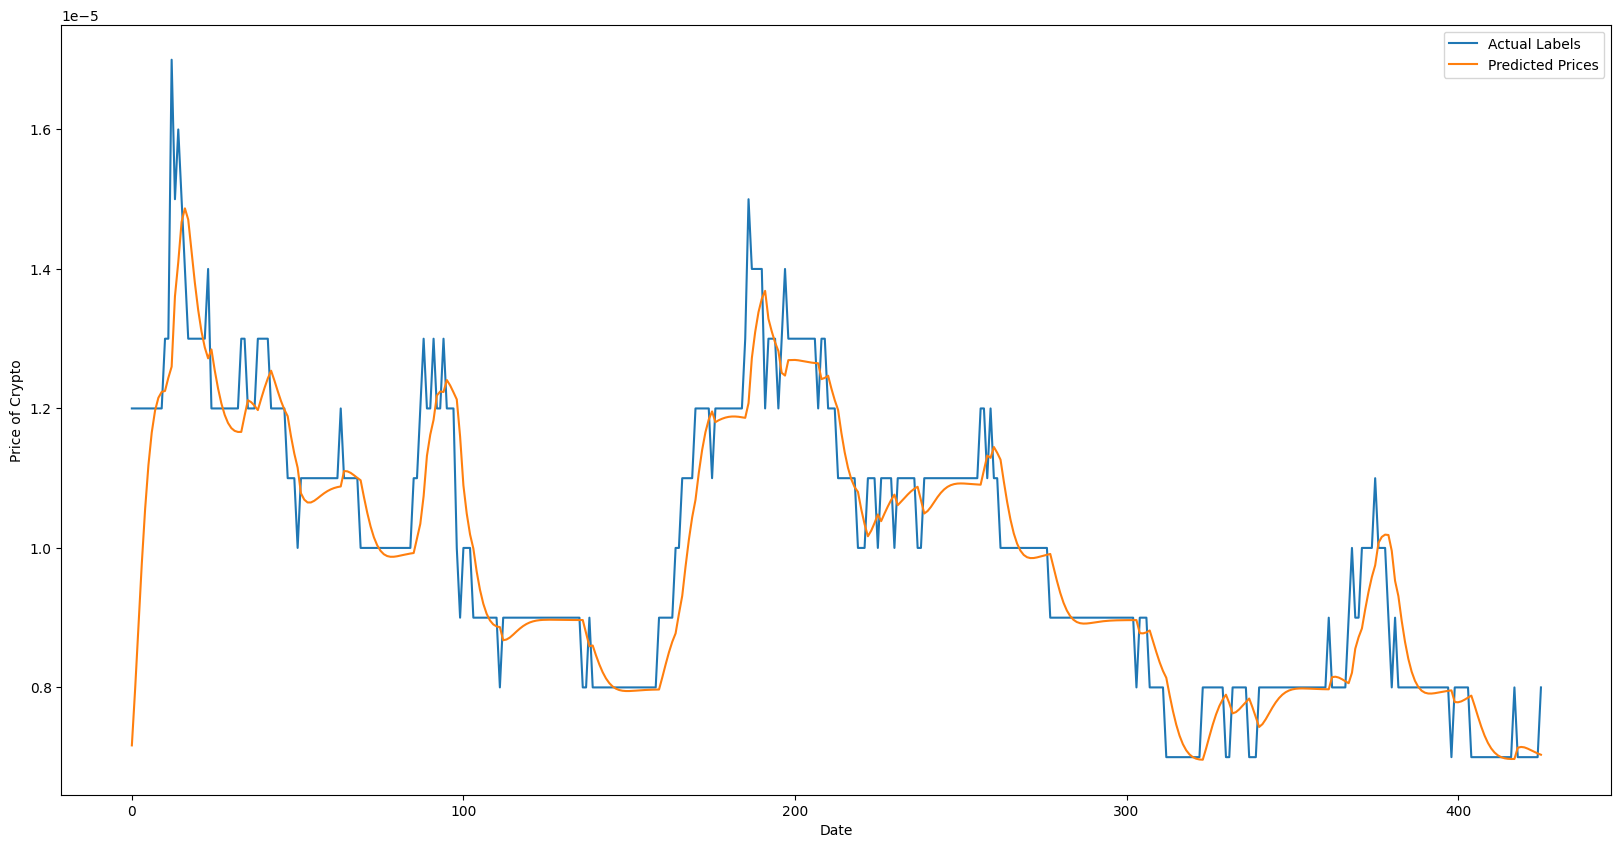

In [69]:
plt.figure(figsize=(20, 10))
plt.plot(actual_labels, label="Actual Labels")
plt.plot(predicted_prices, label="Predicted Prices" )
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price of Crypto")
plt.show()